In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Import data

#### VN-index

In [52]:
# Read the CSV file
vni = pd.read_csv(r'C:\Documents\PTTK\Project\VN Index Historical Data.csv')

vni = vni.sort_index(ascending=False)
vni = vni.reset_index(drop=True)
vni['Date'] = pd.to_datetime(vni['Date'])
vni.set_index('Date', inplace=True)

# Format data
# Remove the '%' sign and convert to float
vni['Change %'] = vni['Change %'].replace('%', '', regex=True).astype(float)

# Convert the percentage values to decimals (divide by 100)
vni['Change %'] = vni['Change %'] / 100

# Format column "Price", "Open", "High", "Low"
for col in ['Price', 'Open', 'High', 'Low']:
    vni[col] = vni[col].str.replace(',', '').astype(float)


missing_values = vni.isnull().sum()
vni = vni.dropna()

# Function to convert 'K' values to integers
def convert_volume(value):
    if pd.isnull(value):
        return np.nan  # Handle missing values
    elif 'K' in value:
        return float(value.replace('K', '')) * 1000
    elif 'M' in value:
        return float(value.replace('M', '')) * 1000000
    elif 'B' in value:
        return float(value.replace('B', '')) * 1000000000
    else:
        return float(value)

# Apply the function to the "Volume" column
vni['Vol.'] = vni['Vol.'].apply(convert_volume)

# Display the cleaned DataFrame
vni

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-01-02,966.67,960.26,966.67,959.67,200600.0,0.0059
2020-01-03,965.14,968.72,970.88,965.14,174130.0,-0.0016
2020-01-06,955.79,962.79,963.20,955.59,187200.0,-0.0097
2020-01-07,958.88,955.79,959.46,953.19,181630.0,0.0032
2020-01-08,948.98,954.13,955.84,945.28,319170.0,-0.0103
...,...,...,...,...,...,...
2024-10-28,1254.77,1252.72,1255.18,1250.94,482690000.0,0.0016
2024-10-29,1261.78,1258.03,1262.38,1257.43,875050000.0,0.0056
2024-10-30,1258.63,1261.78,1264.84,1255.07,536850000.0,-0.0025


#### HSG

In [53]:
# Read the CSV file
hsg = pd.read_csv(r'C:\Documents\PTTK\Project\HSG Historical Data.csv')

hsg = hsg.sort_index(ascending=False)
hsg = hsg.reset_index(drop=True)
hsg['Date'] = pd.to_datetime(hsg['Date'])
hsg.set_index('Date', inplace=True)

# Modify data
# Remove the '%' sign and convert to float
hsg['Change %'] = hsg['Change %'].replace('%', '', regex=True).astype(float)

# Convert the percentage values to decimals (divide by 100)
hsg['Change %'] = hsg['Change %'] / 100

# Format column "Price", "Open", "High", "Low"
for col in ['Price', 'Open', 'High', 'Low']:
    hsg[col] = hsg[col].str.replace(',', '').astype(float)

missing_values = hsg.isnull().sum()
hsg = hsg.dropna()

# Function to convert 'K' values to integers
def convert_volume(value):
    if pd.isnull(value):
        return np.nan  # Handle missing values
    elif 'K' in value:
        return float(value.replace('K', '')) * 1000
    elif 'M' in value:
        return float(value.replace('M', '')) * 1000000
    elif 'B' in value:
        return float(value.replace('B', '')) * 1000000000
    else:
        return float(value)

# Apply the function to the "Volume" column
hsg['Vol.'] = hsg['Vol.'].apply(convert_volume)

# Display the cleaned DataFrame
hsg

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-01-02,5909.1,5598.8,5909.1,5591.6,4550000.0,0.0487
2020-01-03,5757.6,5916.3,5923.5,5743.1,4200000.0,-0.0256
2020-01-06,5786.4,5772.0,5880.2,5692.6,6590000.0,0.0050
2020-01-07,5721.5,5786.4,5858.6,5714.3,3200000.0,-0.0112
2020-01-08,5678.2,5663.8,5735.9,5591.6,5050000.0,-0.0076
...,...,...,...,...,...,...
2024-10-28,20750.0,20650.0,20900.0,20500.0,6510000.0,0.0222
2024-10-29,20700.0,20900.0,20900.0,20600.0,5120000.0,-0.0024
2024-10-30,20350.0,20700.0,20750.0,20300.0,5430000.0,-0.0169


#### NKG

In [54]:
# Read the CSV file
nkg = pd.read_csv(r'C:\Documents\PTTK\Project\NKG Historical Data.csv')
nkg = nkg.sort_index(ascending=False)
nkg = nkg.reset_index(drop=True)
nkg['Date'] = pd.to_datetime(nkg['Date'])
nkg.set_index('Date', inplace=True)

# Modify data
# Remove the '%' sign and convert to float
nkg['Change %'] = nkg['Change %'].replace('%', '', regex=True).astype(float)

# Convert the percentage values to decimals (divide by 100)
nkg['Change %'] = nkg['Change %'] / 100

# Format column "Price", "Open", "High", "Low"
for col in ['Price', 'Open', 'High', 'Low']:
    nkg[col] = nkg[col].str.replace(',', '').astype(float)


missing_values = nkg.isnull().sum()
nkg = nkg.dropna()

# Function to convert 'K' values to integers
def convert_volume(value):
    if pd.isnull(value):
        return np.nan  # Handle missing values
    elif 'K' in value:
        return float(value.replace('K', '')) * 1000
    elif 'M' in value:
        return float(value.replace('M', '')) * 1000000
    elif 'B' in value:
        return float(value.replace('B', '')) * 1000000000
    else:
        return float(value)

# Apply the function to the "Volume" column
nkg['Vol.'] = nkg['Vol.'].apply(convert_volume)

# Display the cleaned DataFrame
nkg

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-01-02,4849.1,4468.0,4849.1,4468.0,1500000.0,0.0696
2020-01-03,4987.1,4960.8,5065.9,4960.8,1230000.0,0.0285
2020-01-06,5079.1,4987.1,5118.5,4868.8,691530.0,0.0184
2020-01-07,5079.1,5079.1,5111.9,5026.5,1850000.0,0.0000
2020-01-08,5203.9,5079.1,5210.5,4901.7,1590000.0,0.0246
...,...,...,...,...,...,...
2024-10-28,20700.0,20600.0,21100.0,20600.0,3230000.0,0.0122
2024-10-29,20750.0,20850.0,20850.0,20650.0,1710000.0,0.0024
2024-10-30,20650.0,20850.0,20850.0,20550.0,1650000.0,-0.0048


### Chi-Square Test

In [55]:
# Define the function to categorize the return percentage into Increase, Decrease, No Change
def categorize_return(value):
    if value > 0:
        return 'Increase'
    elif value < 0:
        return 'Decrease'
    else:
        return 'No Change'

# Merge the dataframes on their datetime indices
merged_data = hsg[['Change %']].merge(nkg[['Change %']], left_index=True, right_index=True, suffixes=('_HSG', '_NKG'))
merged_data = merged_data.merge(vni[['Change %']], left_index=True, right_index=True)
merged_data.rename(columns={'Change %': 'Change %_VNI'}, inplace=True)

# Apply the categorize_return function to categorize the returns
merged_data['Category_HSG'] = merged_data['Change %_HSG'].apply(categorize_return)
merged_data['Category_NKG'] = merged_data['Change %_NKG'].apply(categorize_return)
merged_data['Category_VNI'] = merged_data['Change %_VNI'].apply(categorize_return)

# Create the contingency table
contingency_table = pd.crosstab([merged_data['Category_HSG'], merged_data['Category_NKG']], merged_data['Category_VNI'])

# Perform Chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Hypothesis Test Result
if p_value < 0.05:
    print("Reject null hypothesis: The price movements between HSG, NKG, and VNI are not independent.")
else:
    print("Fail to reject null hypothesis: The price movements between HSG, NKG, and VNI are independent.")


Chi-square statistic: 231.98377960769855
P-value: 2.5159823916893366e-40
Reject null hypothesis: The price movements between HSG, NKG, and VNI are not independent.


### Beta calculation

In [56]:
# List of stocks and suffixes for columns
stocks = {'HSG': hsg, 'NKG': nkg}

# Loop through each stock to calculate its Beta with respect to the VN-Index
for stock_name, stock_data in stocks.items():
    # Align indices by taking the intersection of dates between stock and VN-Index data
    aligned_data = stock_data[['Change %']].join(vni[['Change %']], how='inner', lsuffix=f'_{stock_name}', rsuffix='_VNI')
    
    # Drop any rows with NaN values to ensure no gaps in 'Change %' data
    aligned_data = aligned_data.dropna()

    # Calculate the covariance between the stock and the VN-Index
    covariance = np.cov(aligned_data[f'Change %_{stock_name}'], aligned_data['Change %_VNI'])[0][1]
    
    # Calculate the variance of the VN-Index
    market_variance = aligned_data['Change %_VNI'].var()
    
    # Calculate Beta
    beta = covariance / market_variance
    
    print(f"Beta of {stock_name} with respect to VNI: {beta}")


Beta of HSG with respect to VNI: 1.5220974932793132
Beta of NKG with respect to VNI: 1.4862799408767982


### Pearson correlation

In [57]:
from scipy.stats import pearsonr

# Merge the data on their indices (datetime indices)
merged_data = hsg[['Change %']].merge(nkg[['Change %']], left_index=True, right_index=True, suffixes=('_HSG', '_NKG'))
merged_data = merged_data.merge(vni[['Change %']], left_index=True, right_index=True)
merged_data = merged_data.rename(columns={'Change %': 'Change %_VNI'})

# Calculate Pearson correlation between HSG and NKG
correlation_hsg_nkg, _ = pearsonr(merged_data['Change %_HSG'], merged_data['Change %_NKG'])
print(f"Pearson correlation between HSG and NKG: {correlation_hsg_nkg}")

# Calculate Pearson correlation between HSG and VNI
correlation_hsg_vni, _ = pearsonr(merged_data['Change %_HSG'], merged_data['Change %_VNI'])
print(f"Pearson correlation between HSG and VNI: {correlation_hsg_vni}")

# Calculate Pearson correlation between NKG and VNI
correlation_nkg_vni, _ = pearsonr(merged_data['Change %_NKG'], merged_data['Change %_VNI'])
print(f"Pearson correlation between NKG and VNI: {correlation_nkg_vni}")

Pearson correlation between HSG and NKG: 0.8321837957996118
Pearson correlation between HSG and VNI: 0.6283786920288396
Pearson correlation between NKG and VNI: 0.6079012566188022


### Change of HSG, NKG and VN-Index

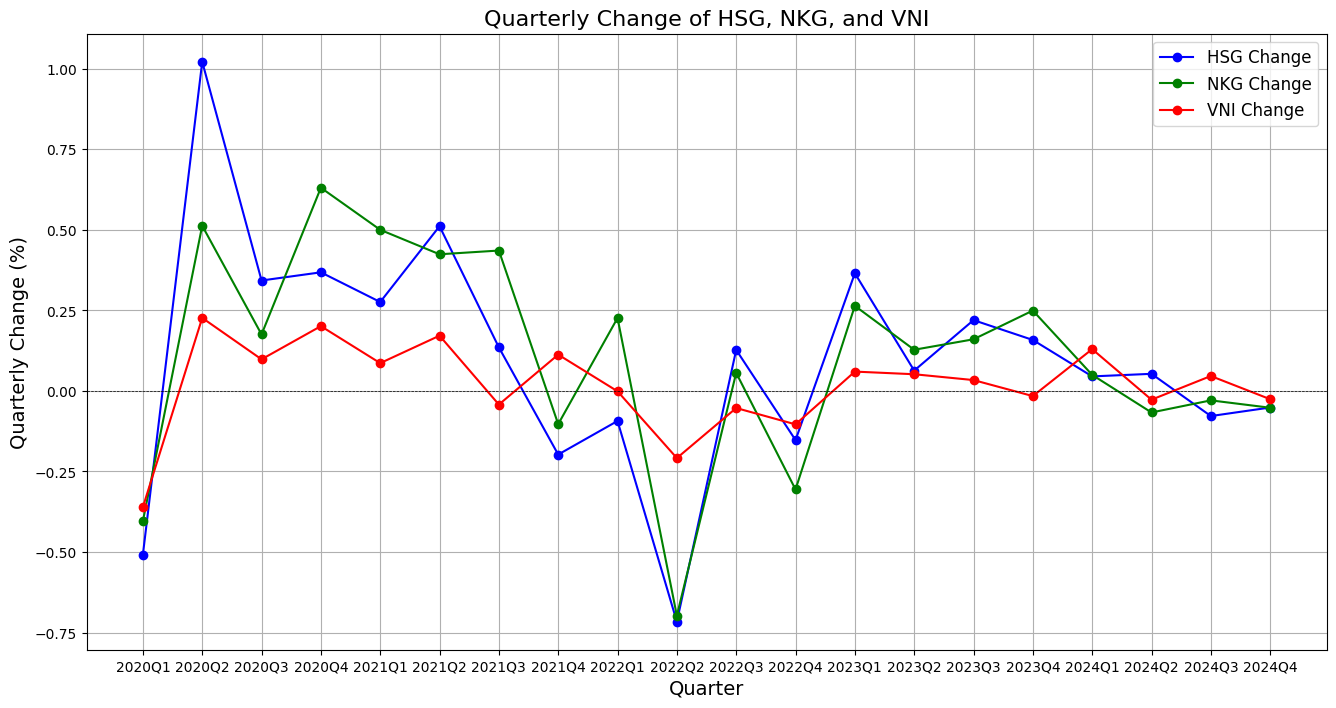

In [58]:
# Adding a period column for quarters
hsg['Quarter'] = hsg.index.to_period('Q')
nkg['Quarter'] = nkg.index.to_period('Q')
vni['Quarter'] = vni.index.to_period('Q')

# Calculate quarterly cumulative change
hsg_quarterly_change = hsg.groupby('Quarter')['Change %'].sum()
nkg_quarterly_change = nkg.groupby('Quarter')['Change %'].sum()
vni_quarterly_change = vni.groupby('Quarter')['Change %'].sum()

# Plotting
plt.figure(figsize=(16, 8))  
plt.plot(hsg_quarterly_change.index.astype(str), hsg_quarterly_change, label='HSG Change', color='blue', marker='o')
plt.plot(nkg_quarterly_change.index.astype(str), nkg_quarterly_change, label='NKG Change', color='green', marker='o')
plt.plot(vni_quarterly_change.index.astype(str), vni_quarterly_change, label='VNI Change', color='red', marker='o')

# Adding zero reference line
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

# Labels and Title
plt.title('Quarterly Change of HSG, NKG, and VNI', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Quarterly Change (%)', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()
